# Assignment:
Code the algorithm of the Hadamard test that we covered in class using the Python SDK (below is a print screen of the Qmod for your convenience). Execute it from the SDK using 1,000 , 2,000 , 4,000 , 8,000 and 16,000 shots, and for each job calculate the (real part of the) expectation value using the formula $Re{\Braket{0| U_{QFT}|0}} = 2P_0-1$
Plot a graph of the expectation value as a function of the number of shots. Add the theoretical value to the graph. Explain the results.

Let's walk through a step-by-step calculation of the Hadamard test on a 4-qubit Quantum Fourier Transform (QFT).
1. Initial State Preparation
We start by preparing the ancillary qubit in the state $\Ket{0}$ and the four-qubit register (let's call it $\Ket{\phi}$) in the state $\Ket{0000}$.
State:
$$\Ket{\psi_0} = \Ket{0}\Ket{0000} = \Ket{00000}$$

2. Applying the First Hadamard Gate
Apply a Hadamard aget to the ancillary qubit. The Hadamard gate transforms $\Ket{0}$ to $\frac{\Ket{0} +\Ket{1}}{\sqrt{2}}$
,so state after this operation:
$$\Ket{\psi_1} =\frac{\Ket{0}\Ket{0000} +\Ket{1}\Ket{0000}}{\sqrt{2}}$$

3. Controlled QFT on the 4-qubit register
The QFT is applied to the 4-qubit register $\phi$ only when the ancillary qubit is $\Ket{1}$. The QFT on $\Ket{0000}$ distributes amplitudes evenly across all computational basis states:
$$QFT\Ket{0000} = \frac{1}{4}(\Ket{0000} + \Ket{0001} + ... + \Ket{1111})$$
State after the operation:
$$\Ket{\psi_2} =\frac{\Ket{0}\Ket{0000} +\frac{1}{4}\Ket{1}\sum_{k=0}^{15}\Ket{k}}{\sqrt{2}}$$

4. Applying the second Hadamard gate
The second Hadamard gate is applied to the ancillary qubit, leading to interference affects which are key to computing expectation value.
State after:
$$\Ket{\psi_3} = \frac{1}{2} \left[ (\Ket{0} + \Ket{1}) \Ket{0000} + (\Ket{0} - \Ket{1})\frac{1}{4} \sum_{k=0}^{15} \Ket{k} \right]
= \frac{1}{2} \left[ \Ket{0}\left(\Ket{0000} + \frac{1}{4} \sum_{k=0}^{15}\Ket{k} \right) + \Ket{1} \left(\Ket{0000} - \frac{1}{4} \sum_{k=0}^{15} \Ket{k} \right) \right]$$

5. Measuring ancillary qubit
Finally, measure the ancillary qubit in the computational basis. The outcome probabilities (especially \Ket{0}) are used to compute the expectation value. The probability $P_0$ of measuring the ancillary qubit in the state $\Ket{0}$ comes from the amplitude associated with $\Ket{0}$, squared. Calculating $$P_0 = \left(\frac{1}{2}\right)^2\left(1,25^2+ 15*\left(\frac{1}{4}\right)^2\right) = \frac{1}{4}*(1,5625+15*0,0625) = (1,5625+0,9375) = 0,625$$

Expectation Value:
Expectation value = $2*P_0 - 1 =2*0,625 -1 = 0,25 $

Let's do it with a circuit

In [1]:
from classiq.execution import ExecutionPreferences
from classiq import *
import matplotlib.pyplot as plt

Function which for each job calculate the (real part of the) expectation value using the formula $Re{\Braket{0| U_{QFT}|0}} = 2P_0-1$

In [2]:
def calculate_expectation(result):
    """
    Calculates the expectation value from the result of a quantum circuit execution.

    Parameters:
    - result: Result from the quantum circuit execution.

    Returns:
    - float:  Calculated expectation value.
    """
    counts = result[0].value.counts
    p0 = result[0].value.counts["0"] / sum(result[0].value.counts.values())
    return 2 * p0 - 1

This function defines a quantum circuit for Hadamard Test algorithm. The circuit is executed with a specified number of shots, and the result is used to compute the expectation value of the measurement on the ancillary qubit. This expectation value is related to the real part of the overlap between the initial state and the state transformed by the 4-qubit QFT.

In [3]:
def run_hadamard_test(shots):
    """
    Runs the Hadamard test for a quantum circuit and calculates the expectation value.

    Parameters:
    - shots (int): The number of repetitions of the circuit

    Returns:
    - float: The calculated expectation value from the Hadamard Test
    """

    @qfunc
    def main(expectation_value: Output[QBit]):
        allocate(1, expectation_value)
        psi = QArray("psi")
        allocate(4, psi)
        hadamard_transform(expectation_value)
        control(expectation_value, lambda: qft(psi))
        hadamard_transform(expectation_value)

    qmod = create_model(main)
    qmod = set_execution_preferences(qmod, execution_preferences=ExecutionPreferences(num_shots=shots))
    qprog = synthesize(qmod)

    result = execute(qprog).result()

    return calculate_expectation(result)

Circuit activation for 1000, 2000, 4000, 8000, 16000 shots.

In [12]:
shots_list = [1000, 2000, 4000, 8000, 16000]
results = [run_hadamard_test(shots) for shots in shots_list]

In [13]:
results

[0.262,
 0.2350000000000001,
 0.25550000000000006,
 0.24825000000000008,
 0.24987500000000007]

Plotting the results

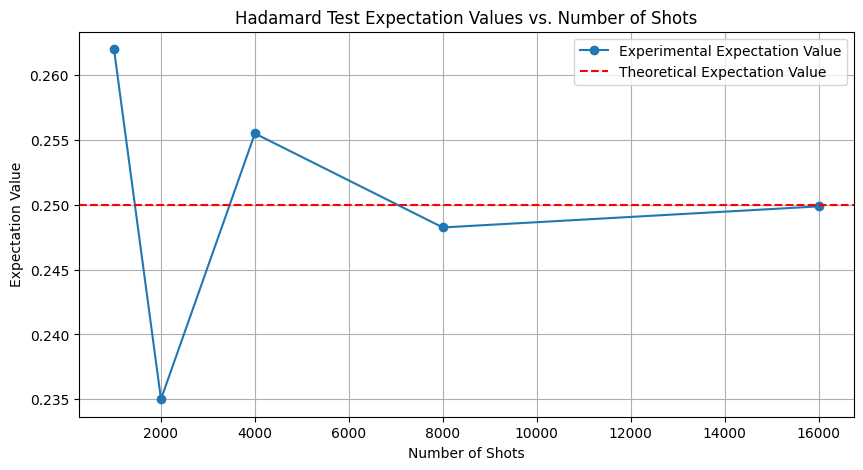

In [14]:
theoretical_value = 0.25
plt.figure(figsize=(10, 5))
plt.plot(shots_list, results, 'o-', label='Experimental Expectation Value')
plt.axhline(y=theoretical_value, color='r', linestyle='--', label='Theoretical Expectation Value')
plt.xlabel('Number of Shots')
plt.ylabel('Expectation Value')
plt.title('Hadamard Test Expectation Values vs. Number of Shots')
plt.legend()
plt.grid(True)
plt.show()

The dashed red line represents the theoretical expectation value, which remains constant across different numbers of shots. This value acts as a benchmark against which the experimental results are compared.

The blue line represents the experimental expectation values obtained from running the quantum circuit a specified number of shots (1000, 2000, 4000, 8000, 12000, 16000). Each point measures the expectation value calculated from the output of the Hadamard test.

There appears to be a trend where the experimental expectation values converge towards the theoretical expectation as the number of shots increases. This is typical in quantum experiments, as increasing the number of shots leads to a more accurate approximation of the quantum state's true probabilities by averaging out random variations.

At 1000,2000 and 4000 shots, there are noticeable dips in the experimental expectation values.
The gradual increase from 8000 to 16000 shots suggests that the experimental setup might be stabilizing and providing more reliable data as the number of measurements increases.